In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/player_data_event_details.csv')

In [4]:
data.head(10)

,match_id,map_name,game_mode,player_id,player_name,player_account_id,login_time,logout_time,session_time_sec,primary_weapon,...,LogSwimEnd_count,LogSwimStart_count,LogVaultStart_count,LogVehicleDamage_count,LogVehicleDestroy_count,LogVehicleLeave_count,LogVehicleRide_count,LogWeaponFireCount_count,LogWheelDestroy_count,event_details
0,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,2727aabd-287a-41dc-adce-04148d7cdafc,seulO_O,account.ae62cf516f08404ab2a7f13130efa57a,2024-11-28T12:41:42.294000,2024-11-28T13:04:19.328000,1357.034,Item_Weapon_MP5K_C,...,0,0,29,0,0,1,1,2,0,"{""LogVehicleRide_details"": [{""character_accoun..."
1,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,4f3cd113-9a48-43c3-82f3-f9045cfb21a8,H_O_L_I_C,account.fd5033f4029d496b8c672108f191efb3,2024-11-28T12:41:51.579000,2024-11-28T12:47:50.629000,359.050,Item_Weapon_Thompson_C,...,0,0,8,0,0,1,1,1,0,"{""LogVehicleRide_details"": [{""character_accoun..."
2,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,fbd5d5b1-e3e8-49c3-8e5f-8b03a607ca56,ZER0_100,account.73ab78e3325d4cfbb9f2101683736830,2024-11-28T12:41:42.782000,2024-11-28T12:46:30.313000,287.531,Item_Weapon_ACE32_C,...,0,0,2,0,0,1,1,0,0,"{""LogPlayerAttack_details"": [{""attacker_accoun..."
3,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e87810c3-6195-49ca-995a-672b13a23826,Anthony-Davis2,account.dc5cce3eacc74887b2640825394a4cfc,2024-11-28T12:41:42.458000,2024-11-28T12:46:28.611000,286.153,Item_Weapon_HK416_C,...,0,0,2,0,0,1,1,2,0,"{""LogVehicleRide_details"": [{""character_accoun..."
4,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e766fb44-d306-43f0-9983-3bc6acb92a29,ksj2837,account.20dc2e5c10d7426fbd8f24dbb948cb4c,2024-11-28T12:41:42.581000,2024-11-28T13:06:12.377000,1469.796,Item_Weapon_BerylM762_C,...,0,0,18,0,0,1,1,10,0,"{""LogPlayerAttack_details"": [{""attacker_accoun..."
5,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,d528788d-0e4d-44fd-ae56-8c47ccdcf8e1,xYz_KoEun,account.ab40866cc5eb43df81ca64860a16da65,2024-11-28T12:41:42.605000,2024-11-28T12:56:02.843000,860.238,Item_Weapon_UZI_C,...,0,0,7,0,0,1,1,10,0,"{""LogVehicleRide_details"": [{""character_accoun..."
6,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,67acefb6-1254-4390-8bc9-828783576b3b,Hatchery_1,account.6d366e2bee7d41ae86db2ebd058353b9,2024-11-28T12:41:43.255000,2024-11-28T12:46:26.770000,283.515,Item_Weapon_Vector_C,...,0,0,2,0,0,1,1,0,0,"{""LogVehicleRide_details"": [{""character_accoun..."
7,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,f2bce90c-7ad5-4671-9c1e-30dd9ba9b671,JJunHyeokAng,account.53dbeea179084c928697a0482f073acc,2024-11-28T12:41:42.283000,2024-11-28T12:59:42.726000,1080.443,Item_Weapon_QBZ95_C,...,0,0,15,0,0,1,1,5,0,"{""LogVehicleRide_details"": [{""character_accoun..."
8,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,f47d992f-f239-4625-9752-8886bebc35db,hhye___,account.6cbb1e81f4184bc68f48c4bdcf4d03d6,2024-11-28T12:41:42.619000,2024-11-28T12:54:07.240000,744.621,Item_Weapon_HK416_C,...,0,0,0,0,0,1,1,1,0,"{""LogVehicleRide_details"": [{""character_accoun..."
9,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e5a3fa42-33ba-4bca-9051-d17e41873475,AKM0NG_TES,account.f5c9d27df16d47debcbd772035b230db,2024-11-28T12:41:49.519000,2024-11-28T12:44:23.563000,154.044,Item_Weapon_Winchester_C,...,0,0,1,0,0,1,1,0,0,"{""LogPlayerAttack_details"": [{""attacker_accoun..."


In [5]:
data.columns

# 콜렉터 : items_carried, LogItemUse

Index(['match_id', 'map_name', 'game_mode', 'player_id', 'player_name',
       'player_account_id', 'login_time', 'logout_time', 'session_time_sec',
       'primary_weapon', 'secondary_weapon', 'armor_type',
       'use_of_health_items', 'use_of_boost_items', 'items_carried',
       'time_spent_looting_sec', 'time_spent_in_combat_sec', 'kills',
       'damage_dealt', 'movement_routes', 'first_location_x',
       'first_location_y', 'first_location_z', 'final_location_x',
       'final_location_y', 'final_location_z', 'walk_distance',
       'swim_distance', 'ride_distance', 'road_kills', 'vehicle_destroys',
       'weapons_acquired', 'boosts', 'heals', 'kill_streaks', 'headshot_kills',
       'assists', 'revives', 'team_kills', 'win_place', 'team_id', 'team_rank',
       'team_won', 'elapsedTime', 'numAlivePlayers', 'LogArmorDestroy_count',
       'LogBlackZoneEnded_count', 'LogCarePackageLand_count',
       'LogCarePackageSpawn_count', 'LogCharacterCarry_count',
       'LogEmPickupLif

In [6]:
data['LogItemUse_count']

,LogItemUse_count
0,11
1,5
2,8
3,2
4,21
...,...
170751,0
170752,0
170753,3
170754,0


In [5]:
data['item_count'] = data['items_carried'].apply(lambda x: len(str(x).split(','))-1)
data['item_count']

,item_count
0,65
1,26
2,24
3,6
4,77
...,...
170751,1
170752,2
170753,17
170754,3


In [6]:
data1 = data1[data1['item_count'] < 300]

NameError: name 'data1' is not defined

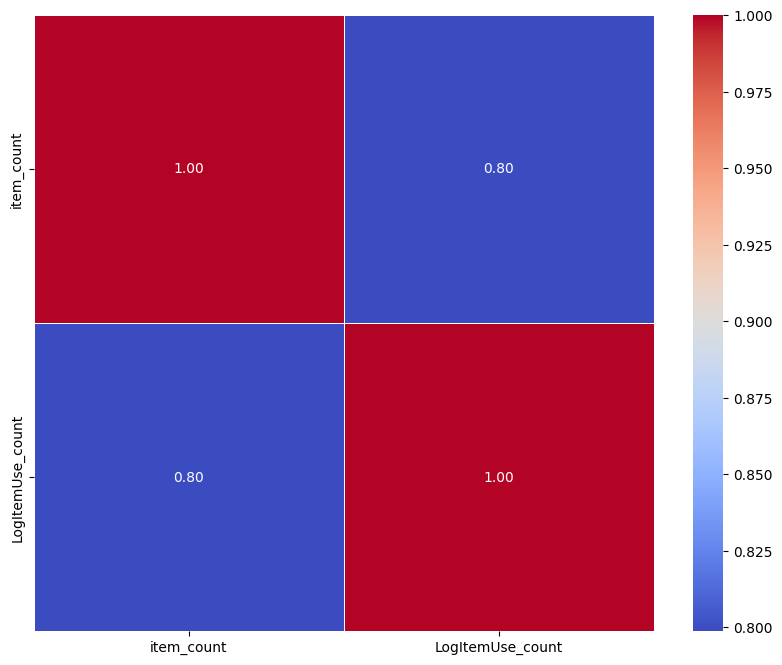

In [8]:
# 상관관계 계산
correlation_matrix = data[['item_count', 'LogItemUse_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# 높긴 하네

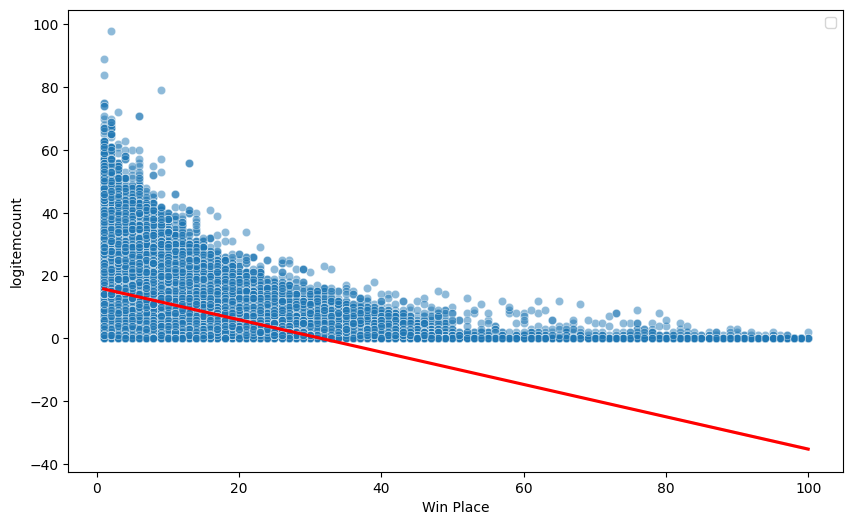

In [9]:
# 아이템 사용 수와 순위와의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['win_place'], y=data['LogItemUse_count'], alpha=0.5)
sns.regplot(x=data['win_place'], y=data['LogItemUse_count'], scatter=False, color='red', line_kws={"label":"Linear Fit"})
plt.xlabel('Win Place')
plt.ylabel('logitemcount')
plt.legend()
plt.show()

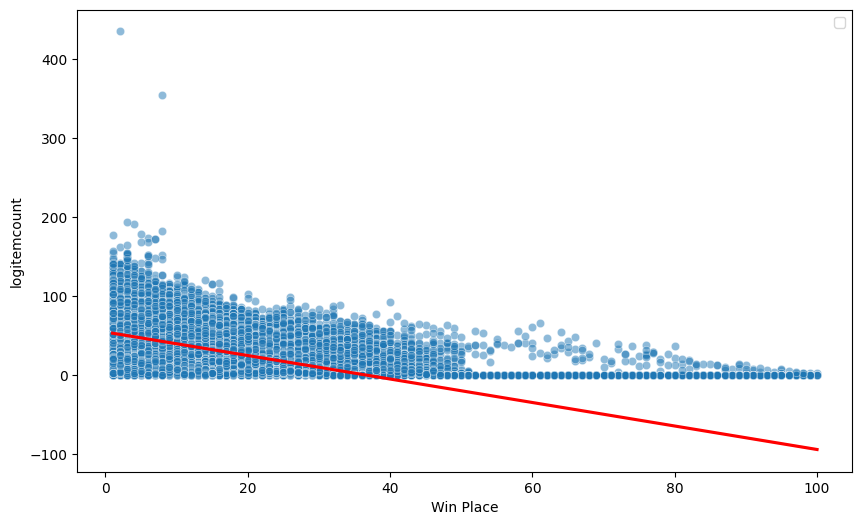

In [10]:
# 아이템 사용 수와 순위와의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['win_place'], y=data['item_count'], alpha=0.5)
sns.regplot(x=data['win_place'], y=data['item_count'], scatter=False, color='red', line_kws={"label":"Linear Fit"})
plt.xlabel('Win Place')
plt.ylabel('logitemcount')
plt.legend()
plt.show()

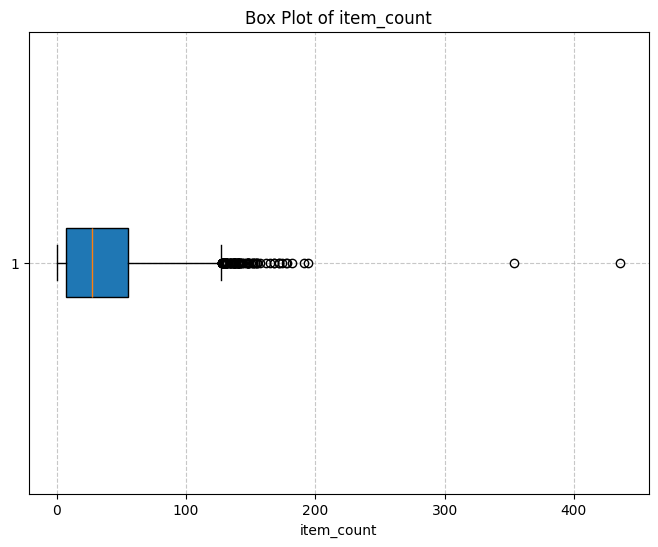

In [11]:
# 300 이상을 이상치로 판단해 제외하도록
plt.figure(figsize=(8, 6))
plt.boxplot(data['item_count'], vert=False, patch_artist=True)
plt.title('Box Plot of item_count')
plt.xlabel('item_count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

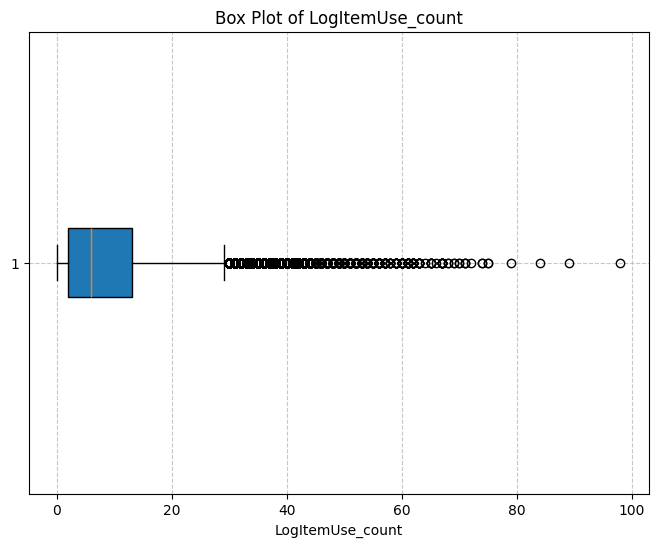

In [12]:
# 딱히 이상치 없는 듯
plt.figure(figsize=(8, 6))
plt.boxplot(data['LogItemUse_count'], vert=False, patch_artist=True)
plt.title('Box Plot of LogItemUse_count')
plt.xlabel('LogItemUse_count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
# 아이템 수가 0인 애들은 분석에서 제외하도록 함. 대략 2만개
data1 = data[data['item_count'] <= 300].reset_index(drop=True)
data2 = data1[data1['item_count'] != 0].reset_index(drop=True)

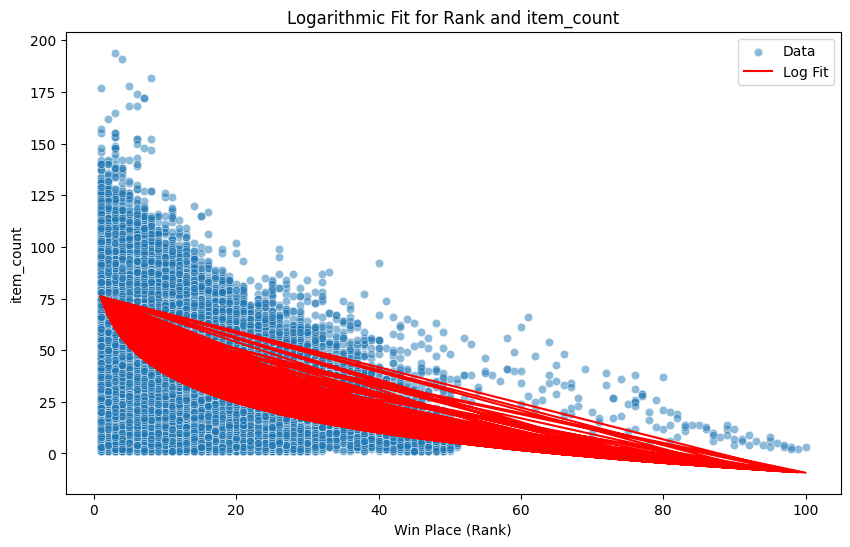

Model Coefficient: [-21.7076393]
Model Intercept: 90.83746743098396


In [8]:
from sklearn.linear_model import LinearRegression

data2['log_win_place'] = np.log1p(data2['win_place'])  # log(1 + x) 변환

# 로그-선형 회귀
X_log = data2[['log_win_place']]  # 로그 변환된 변수
y = data2['item_count']

# 모델 학습
log_model = LinearRegression()
log_model.fit(X_log, y)

# 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['win_place'], y=data2['item_count'], alpha=0.5, label='Data')
plt.plot(data2['win_place'], log_model.predict(X_log), color='red', label='Log Fit')
plt.xlabel('Win Place (Rank)')
plt.ylabel('item_count')
plt.title('Logarithmic Fit for Rank and item_count')
plt.legend()
plt.show()

# 모델의 계수와 절편
print(f"Model Coefficient: {log_model.coef_}")
print(f"Model Intercept: {log_model.intercept_}")

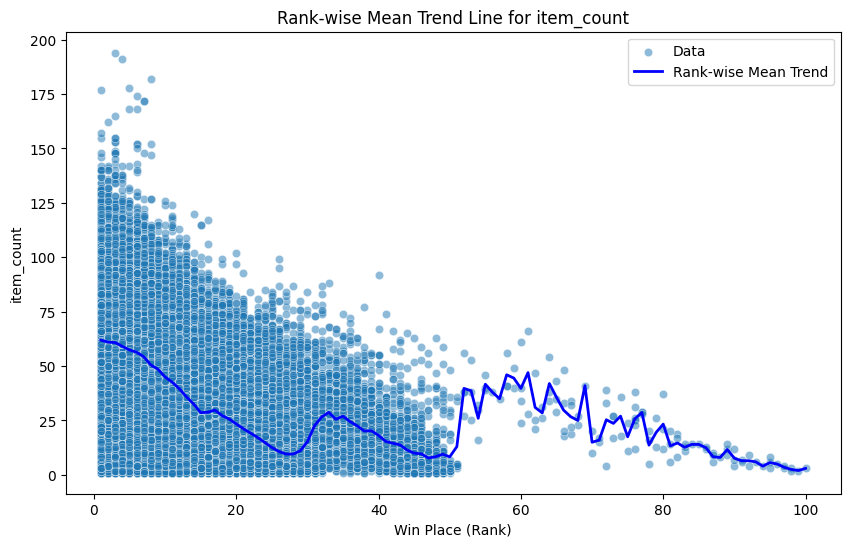

In [15]:
# 순위별 평균 계산
rank_mean = data2.groupby('win_place')['item_count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['win_place'], y=data2['item_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], rank_mean['item_count'], color='blue', label='Rank-wise Mean Trend', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('item_count')
plt.title('Rank-wise Mean Trend Line for item_count')
plt.legend()
plt.show()

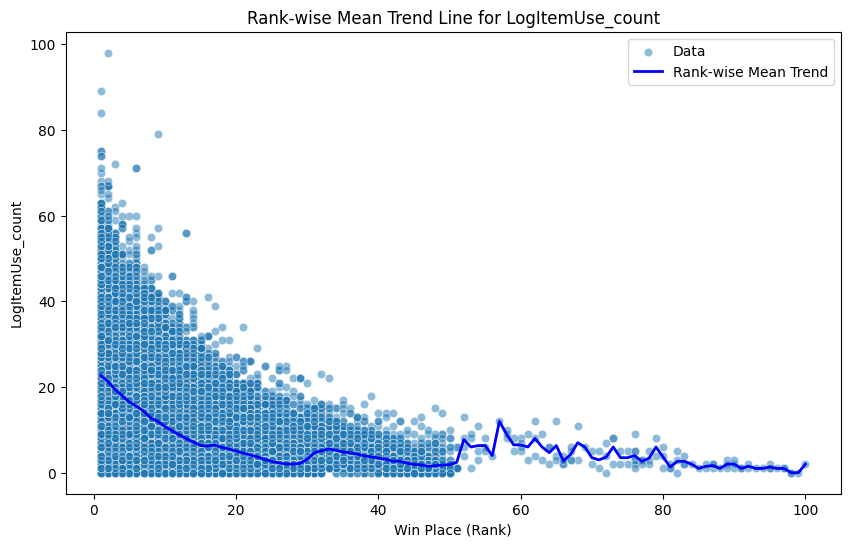

In [16]:
# 순위별 평균 계산
rank_mean = data2.groupby('win_place')['LogItemUse_count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['win_place'], y=data2['LogItemUse_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], rank_mean['LogItemUse_count'], color='blue', label='Rank-wise Mean Trend', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('LogItemUse_count')
plt.title('Rank-wise Mean Trend Line for LogItemUse_count')
plt.legend()
plt.show()

Logarithmic Regression Equation: item_count = -12.2884 * log(1 + win_place) + 69.4783


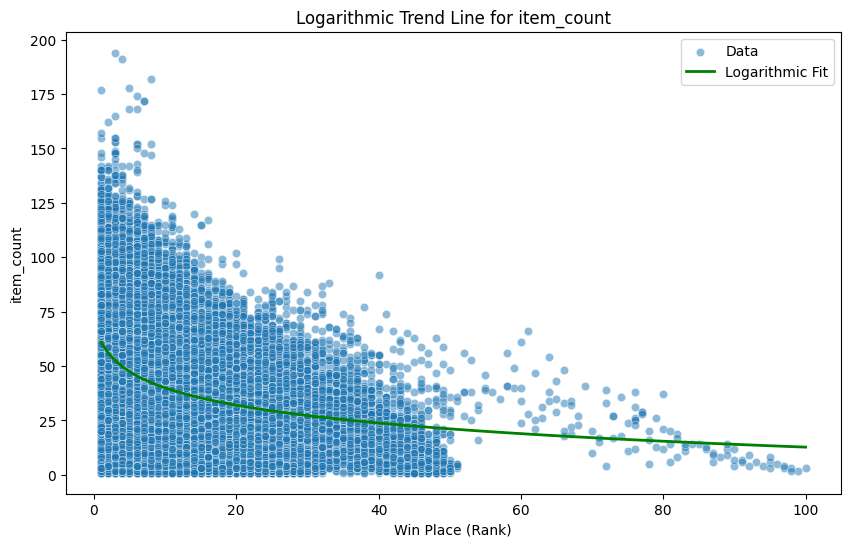

In [39]:
# 아이템 수집 수의 추정로그회귀선

import numpy as np
from sklearn.linear_model import LinearRegression

# 순위별 평균 계산
rank_mean = data2.groupby('win_place')['item_count'].mean().reset_index()

# 로그 변환된 win_place
rank_mean['log_win_place'] = np.log1p(rank_mean['win_place'])  # log(1 + x)

# 로그-회귀 모델 학습
X_log = rank_mean[['log_win_place']]  # 독립 변수 (로그 변환된 win_place)
y_log = rank_mean['item_count']      # 종속 변수

log_model = LinearRegression()
log_model.fit(X_log, y_log)

# 회귀선의 계수와 절편
log_coef = log_model.coef_[0]
log_intercept = log_model.intercept_

print(f"Logarithmic Regression Equation: item_count = {log_coef:.4f} * log(1 + win_place) + {log_intercept:.4f}")

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['win_place'], y=data2['item_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], log_model.predict(X_log), color='green', label='Logarithmic Fit', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('item_count')
plt.title('Logarithmic Trend Line for item_count')
plt.legend()
plt.show()


Logarithmic Regression Equation: LogItemUse_count = -4.3234 * log(1 + win_place) + 21.1004


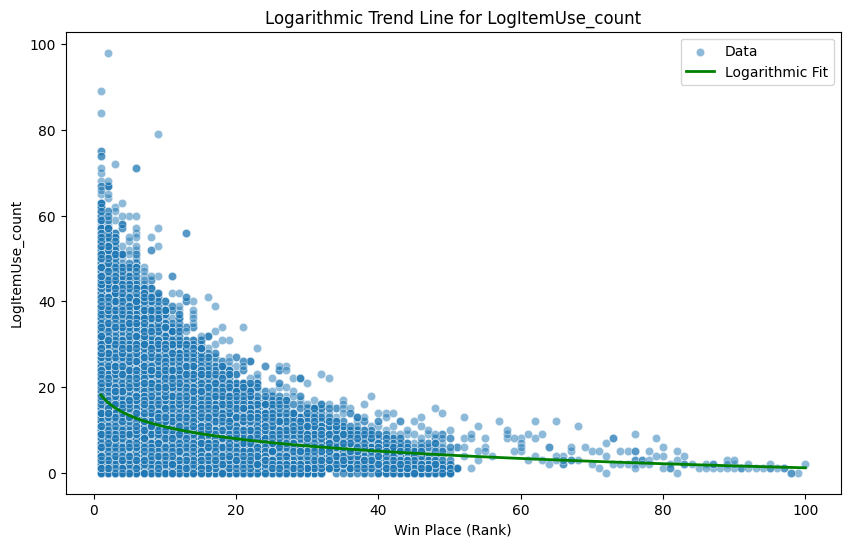

In [40]:
# 아이템 사용 수의 추정로그회귀선

import numpy as np
from sklearn.linear_model import LinearRegression

# 순위별 평균 계산
rank_mean = data2.groupby('win_place')['LogItemUse_count'].mean().reset_index()

# 로그 변환된 win_place
rank_mean['log_win_place'] = np.log1p(rank_mean['win_place'])  # log(1 + x)

# 로그-회귀 모델 학습
X_log = rank_mean[['log_win_place']]  # 독립 변수 (로그 변환된 win_place)
y_log = rank_mean['LogItemUse_count']      # 종속 변수

log_model = LinearRegression()
log_model.fit(X_log, y_log)

# 회귀선의 계수와 절편
log_coef = log_model.coef_[0]
log_intercept = log_model.intercept_

print(f"Logarithmic Regression Equation: LogItemUse_count = {log_coef:.4f} * log(1 + win_place) + {log_intercept:.4f}")

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['win_place'], y=data2['LogItemUse_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], log_model.predict(X_log), color='green', label='Logarithmic Fit', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('LogItemUse_count')
plt.title('Logarithmic Trend Line for LogItemUse_count')
plt.legend()
plt.show()

In [59]:
X = data2[['item_count', 'LogItemUse_count', 'win_place']]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
# 정규화
cont_cols = ['item_count', 'LogItemUse_count']
cont_scaler = StandardScaler()
X[cont_cols] = cont_scaler.fit_transform(X[cont_cols])

<ipython-input-59-0c6277251938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-59-0c6277251938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-59-0c6277251938>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cont_cols] = cont_scaler.fit_transform(X[cont_cols])


In [60]:
X

,item_count,LogItemUse_count,win_place
0,1.075330,0.143503,4
1,-0.402390,-0.504594,17
2,-0.478171,-0.180546,21
3,-1.160195,-0.828642,23
4,1.530013,1.223663,1
...,...,...,...
151348,-1.349646,-1.044674,11
151349,-1.311756,-1.044674,4
151350,-0.743402,-0.720626,7
151351,-1.273866,-1.044674,15


In [61]:
data3 = X
data3

,item_count,LogItemUse_count,win_place
0,1.075330,0.143503,4
1,-0.402390,-0.504594,17
2,-0.478171,-0.180546,21
3,-1.160195,-0.828642,23
4,1.530013,1.223663,1
...,...,...,...
151348,-1.349646,-1.044674,11
151349,-1.311756,-1.044674,4
151350,-0.743402,-0.720626,7
151351,-1.273866,-1.044674,15


### 정규화 후의 추정식

Logarithmic Regression Equation: item_count = -0.4656 * log(1 + win_place) + 1.2450


<ipython-input-62-402db398ba24>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['log_fit2'] = log_coef * np.log1p(data3['win_place']) + log_intercept


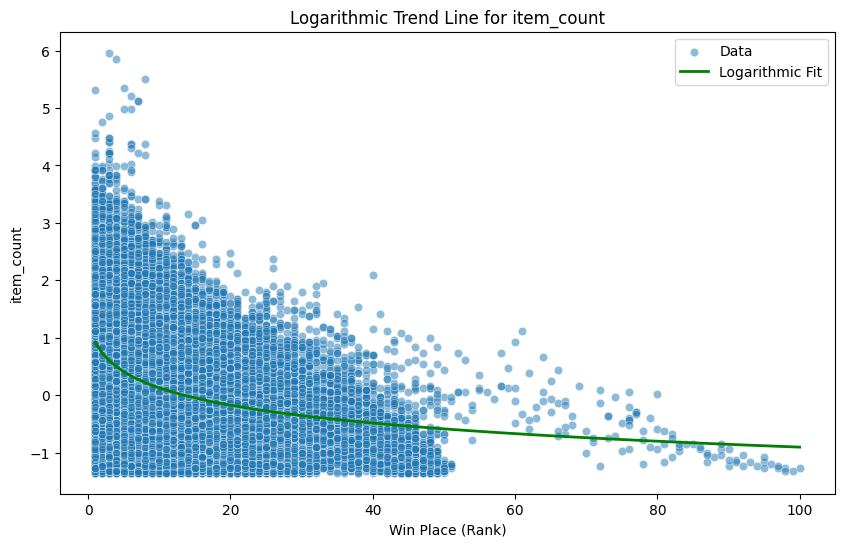

In [62]:
# 아이템 수집 수의 추정로그회귀선

import numpy as np
from sklearn.linear_model import LinearRegression

# 순위별 평균 계산
rank_mean = data3.groupby('win_place')['item_count'].mean().reset_index()

# 로그 변환된 win_place
rank_mean['log_win_place'] = np.log1p(rank_mean['win_place'])  # log(1 + x)

# 로그-회귀 모델 학습
X_log = rank_mean[['log_win_place']]  # 독립 변수 (로그 변환된 win_place)
y_log = rank_mean['item_count']      # 종속 변수

log_model = LinearRegression()
log_model.fit(X_log, y_log)

# 회귀선의 계수와 절편
log_coef = log_model.coef_[0]
log_intercept = log_model.intercept_

print(f"Logarithmic Regression Equation: item_count = {log_coef:.4f} * log(1 + win_place) + {log_intercept:.4f}")
# 모델의 추정값을 log_fit1 열에 저장
data3['log_fit2'] = log_coef * np.log1p(data3['win_place']) + log_intercept


# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data3['win_place'], y=data3['item_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], log_model.predict(X_log), color='green', label='Logarithmic Fit', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('item_count')
plt.title('Logarithmic Trend Line for item_count')
plt.legend()
plt.show()

Logarithmic Regression Equation: LogItemUse_count = -0.4670 * log(1 + win_place) + 1.2345


<ipython-input-63-0b2c4ad76fcb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['log_fit1'] = log_coef * np.log1p(data3['win_place']) + log_intercept


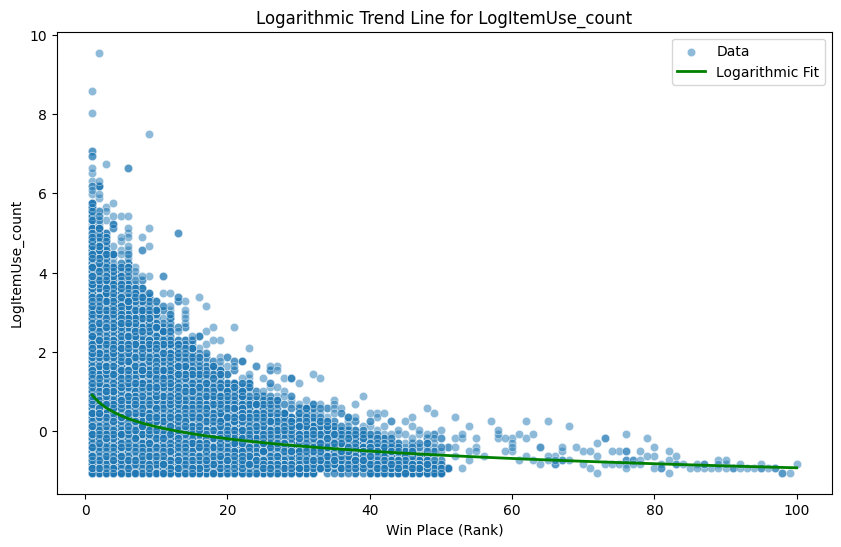

In [63]:
# 아이템 사용 수의 추정로그회귀선 -> 얘가 추정 더 잘 된 듯

import numpy as np
from sklearn.linear_model import LinearRegression

# 순위별 평균 계산
rank_mean = data3.groupby('win_place')['LogItemUse_count'].mean().reset_index()

# 로그 변환된 win_place
rank_mean['log_win_place'] = np.log1p(rank_mean['win_place'])  # log(1 + x)

# 로그-회귀 모델 학습
X_log = rank_mean[['log_win_place']]  # 독립 변수 (로그 변환된 win_place)
y_log = rank_mean['LogItemUse_count']      # 종속 변수

log_model = LinearRegression()
log_model.fit(X_log, y_log)

# 회귀선의 계수와 절편
log_coef = log_model.coef_[0]
log_intercept = log_model.intercept_

print(f"Logarithmic Regression Equation: LogItemUse_count = {log_coef:.4f} * log(1 + win_place) + {log_intercept:.4f}")
# 모델의 추정값을 log_fit1 열에 저장
data3['log_fit1'] = log_coef * np.log1p(data3['win_place']) + log_intercept

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data3['win_place'], y=data3['LogItemUse_count'], alpha=0.5, label='Data')
plt.plot(rank_mean['win_place'], log_model.predict(X_log), color='green', label='Logarithmic Fit', linewidth=2)
plt.xlabel('Win Place (Rank)')
plt.ylabel('LogItemUse_count')
plt.title('Logarithmic Trend Line for LogItemUse_count')
plt.legend()
plt.show()

In [64]:
# 아이템 사용 수에 대하여
above_trend = data3[data3['LogItemUse_count'] > data3['log_fit1']]
below_trend = data3[data3['LogItemUse_count'] <= data3['log_fit1']]

# 위에 있는 거 52746, 아래 있는 거 98607
above_count = above_trend.shape[0]
below_count = below_trend.shape[0]

above_count, below_count

(52746, 98607)

In [65]:
# 아이템 수집 수에 대하여
above_trend = data3[data3['item_count'] > data3['log_fit2']]
below_trend = data3[data3['item_count'] <= data3['log_fit2']]

# 위에 있는 거 70135, 아래 있는 거 81218
above_count = above_trend.shape[0]
below_count = below_trend.shape[0]

above_count, below_count

(69492, 81861)

In [ ]:
# 3. 거리 계산 (각 데이터 포인트가 두 회귀식에서 얼마나 떨어져 있는지)
data3['difference'] = (data3['LogItemUse_count'] - data3['log_fit1']) + (data3['item_count'] - data3['log_fit2'])

# 4. 차이에 따라 분류 (양수는 수집형, 음수는 미니멀리스트)
def categorize(row):
    if row['difference'] > 0:
        return 'Collectivist'  # 차이가 양수면 수집형
    else:
        return 'Minimalist'  # 차이가 음수면 미니멀리스트

# 5. 데이터 포인트에 대해 새로운 분류 적용
data3['category'] = data3.apply(categorize, axis=1)

In [66]:
# log_fit 모델을 각각 변수에 대해서 나누고, 동시 위 혹은 아래에 있는 집단 수 나타내기

both_above = data3[
    (data3['LogItemUse_count'] > data3['log_fit1']) & (data3['item_count'] > data3['log_fit2'])
]

both_below = data3[
    (data3['LogItemUse_count'] <= data3['log_fit1']) & (data3['item_count'] <= data3['log_fit2'])
]

both_above_count = both_above.shape[0]
both_below_count = both_below.shape[0]

both_above_count, both_below_count

(44774, 73889)

In [67]:
# 기존 데이터의 모든 열과 클러스터를 합치기 위해 기존 데이터와 결합
data['cluster'] = None  # cluster 열 초기화

# both_above와 both_below의 클러스터 값을 data3에 추가
data.loc[both_above.index, 'cluster'] = 1
data.loc[both_below.index, 'cluster'] = 0

# clustered_data로 클러스터가 지정된 데이터만 필터링
clustered_data = data[data['cluster'].notnull()]
clustered_data

# 마지막에 열에 클러스터 명시되어있음!!

,match_id,map_name,game_mode,player_id,player_name,player_account_id,login_time,logout_time,session_time_sec,primary_weapon,...,LogVaultStart_count,LogVehicleDamage_count,LogVehicleDestroy_count,LogVehicleLeave_count,LogVehicleRide_count,LogWeaponFireCount_count,LogWheelDestroy_count,event_details,item_count,cluster
1,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,4f3cd113-9a48-43c3-82f3-f9045cfb21a8,H_O_L_I_C,account.fd5033f4029d496b8c672108f191efb3,2024-11-28T12:41:51.579000,2024-11-28T12:47:50.629000,359.050,Item_Weapon_Thompson_C,...,8,0,0,1,1,1,0,"{""LogVehicleRide_details"": [{""character_accoun...",26,0
3,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e87810c3-6195-49ca-995a-672b13a23826,Anthony-Davis2,account.dc5cce3eacc74887b2640825394a4cfc,2024-11-28T12:41:42.458000,2024-11-28T12:46:28.611000,286.153,Item_Weapon_HK416_C,...,2,0,0,1,1,2,0,"{""LogVehicleRide_details"": [{""character_accoun...",6,0
4,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e766fb44-d306-43f0-9983-3bc6acb92a29,ksj2837,account.20dc2e5c10d7426fbd8f24dbb948cb4c,2024-11-28T12:41:42.581000,2024-11-28T13:06:12.377000,1469.796,Item_Weapon_BerylM762_C,...,18,0,0,1,1,10,0,"{""LogPlayerAttack_details"": [{""attacker_accoun...",77,1
5,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,d528788d-0e4d-44fd-ae56-8c47ccdcf8e1,xYz_KoEun,account.ab40866cc5eb43df81ca64860a16da65,2024-11-28T12:41:42.605000,2024-11-28T12:56:02.843000,860.238,Item_Weapon_UZI_C,...,7,0,0,1,1,10,0,"{""LogVehicleRide_details"": [{""character_accoun...",64,1
6,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,67acefb6-1254-4390-8bc9-828783576b3b,Hatchery_1,account.6d366e2bee7d41ae86db2ebd058353b9,2024-11-28T12:41:43.255000,2024-11-28T12:46:26.770000,283.515,Item_Weapon_Vector_C,...,2,0,0,1,1,0,0,"{""LogVehicleRide_details"": [{""character_accoun...",21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151348,d0bf8be9-8c34-4c24-855b-7e3e8af2421c,Savage_Main,squad,f221a546-7f7c-427e-b6c8-5399e46976c8,TaiLastimosa,account.497394df1bb040749305478156ed1155,2024-11-17T14:58:32.721000,2024-11-17T15:02:32.865000,240.144,Item_Weapon_AK47_C,...,6,0,0,1,1,0,0,"{""LogVehicleRide_details"": [{""character_accoun...",20,0
151349,d0bf8be9-8c34-4c24-855b-7e3e8af2421c,Savage_Main,squad,14cb1323-3898-4cd6-8aac-2ebbf8b4d83a,Ez0110,account.47ea2150076a4ef09d998e809599f1d7,2024-11-17T14:58:29.242000,2024-11-17T15:05:17.470000,408.228,Item_Weapon_UZI_C,...,7,0,0,1,1,0,0,"{""LogVehicleRide_details"": [{""character_accoun...",44,0
151350,d0bf8be9-8c34-4c24-855b-7e3e8af2421c,Savage_Main,squad,43985a59-435c-4094-885e-de068495a002,unbroken312,account.f685a7ebb92c475597bed8998edee520,2024-11-17T14:58:26.597000,2024-11-17T15:13:10.372000,883.775,Item_Weapon_M16A4_C,...,13,0,0,2,2,28,0,"{""LogVehicleRide_details"": [{""character_accoun...",65,0
151351,d0bf8be9-8c34-4c24-855b-7e3e8af2421c,Savage_Main,squad,afa400ba-f9a6-4cb8-bf0b-7615af6d62d6,lIIIIllIl,account.2c9626fb855d41b3b068f0a287cd0156,2024-11-17T14:58:26.515000,2024-11-17T15:03:29.862000,303.347,Item_Weapon_UZI_C,...,0,0,0,1,1,2,0,"{""LogPlayerAttack_details"": [{""attacker_accoun...",3,0


In [68]:
#귀무가설1 : 수집형과 미니멀리스트의 아이템 수집 수는 유의한 차이가 없을 것이다.
#귀무가설2 : 수집형과 미니멀리스트의 아이템 사용 수는 유의한 차이가 없을 것이다.

#분포의 정규분포 가정이 없는 Mann-Whitney U 검정을 이용해 검정

#두 통계량 모두 유의하게 나옴. 즉, 귀무가설을 기각하게 되어 수집형과 미니멀리스트의 아이템 00 수는 유의한 차이가 있다라는 결론이 도출됨
from scipy.stats import mannwhitneyu

cluster_1 = clustered_data[clustered_data['cluster'] == 1]
cluster_0 = clustered_data[clustered_data['cluster'] == 0]

item_count_u_stat, item_count_p_value = mannwhitneyu(cluster_1['item_count'], cluster_0['item_count'], alternative='two-sided')
logitemuse_count_u_stat, logitemuse_count_p_value = mannwhitneyu(cluster_1['LogItemUse_count'], cluster_0['LogItemUse_count'], alternative='two-sided')

print("Mann-Whitney U Test Results")
print("=====================================")
print(f"item_count: U-statistic = {item_count_u_stat:.2f}, p-value = {item_count_p_value:.4f}")
print(f"LogItemUse_count: U-statistic = {logitemuse_count_u_stat:.2f}, p-value = {logitemuse_count_p_value:.4f}")

Mann-Whitney U Test Results
item_count: U-statistic = 1670369438.00, p-value = 0.0045
LogItemUse_count: U-statistic = 1667915528.00, p-value = 0.0158


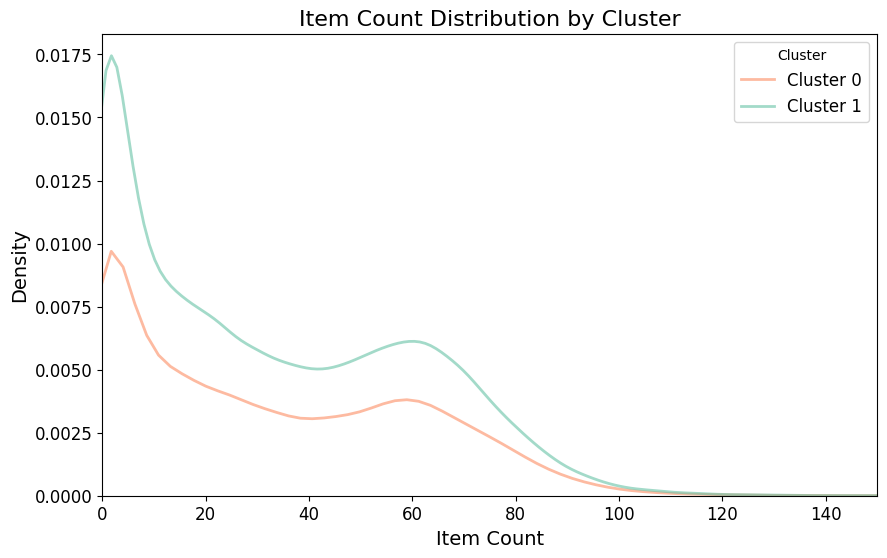

In [69]:
# KDE만 시각화하고 x축을 150까지 제한
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=clustered_data,
    x='item_count',
    hue='cluster',
    palette="Set2",
    alpha=0.6,
    linewidth=2
)
plt.title('Item Count Distribution by Cluster', fontsize=16)
plt.xlabel('Item Count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 150)  # x축을 0에서 150까지 제한
plt.show()

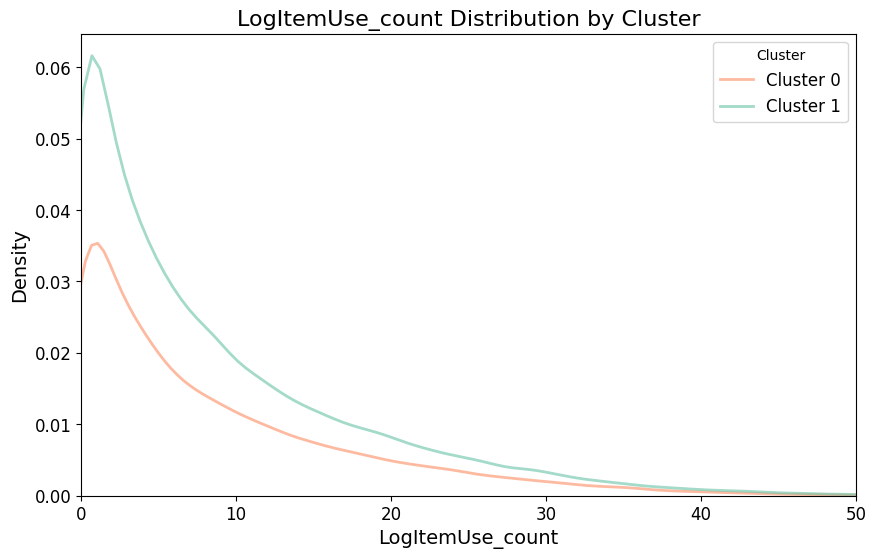

In [70]:
# KDE만 시각화하고 x축을 50까지 제한
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=clustered_data,
    x='LogItemUse_count',
    hue='cluster',
    palette="Set2",
    alpha=0.6,
    linewidth=2
)
plt.title('LogItemUse_count Distribution by Cluster', fontsize=16)
plt.xlabel('LogItemUse_count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 50)  # x축을 0에서 50까지 제한
plt.show()

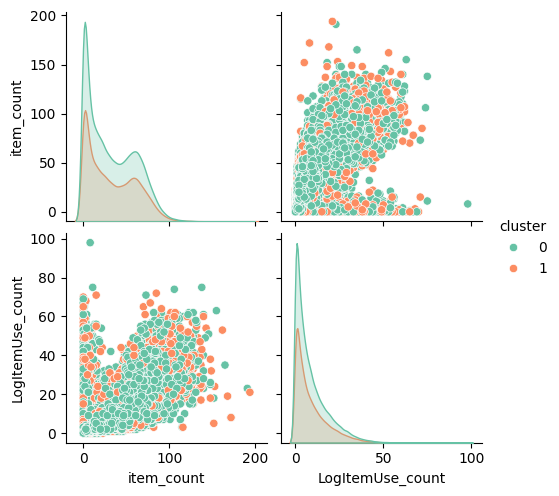

In [74]:
filtered_data = clustered_data[clustered_data['item_count'] < 300]

# 페어플롯 시각화
sns.pairplot(filtered_data, vars=['item_count', 'LogItemUse_count'], hue='cluster', palette="Set2", diag_kind='kde', height=2.5)
plt.show()

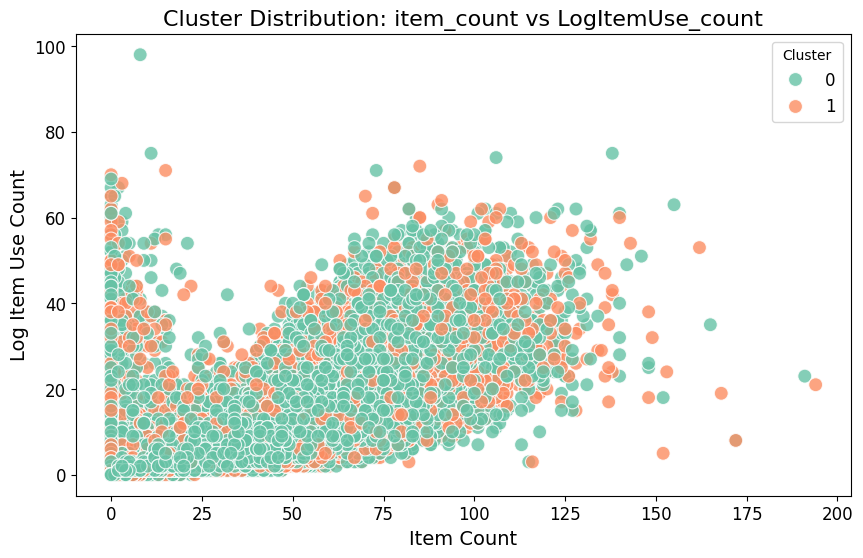

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='item_count',
    y='LogItemUse_count',
    hue='cluster',
    palette="Set2",
    alpha=0.8,
    s=100
)
plt.title('Cluster Distribution: item_count vs LogItemUse_count', fontsize=16)
plt.xlabel('Item Count', fontsize=14)
plt.ylabel('Log Item Use Count', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

헤석 KDE로 가능할 듯..
scatter plot -> 같은 곳에 찍혀있더라도 WIN_PLACE로 보정했으니 적은 시간에 아이템을 해당 수만큼 수집하였느냐, 긴 시간에 아이템을 해당 수만큼 사용하였느냐가 다르니까

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a29147564d0> (for post_execute):


KeyboardInterrupt: 

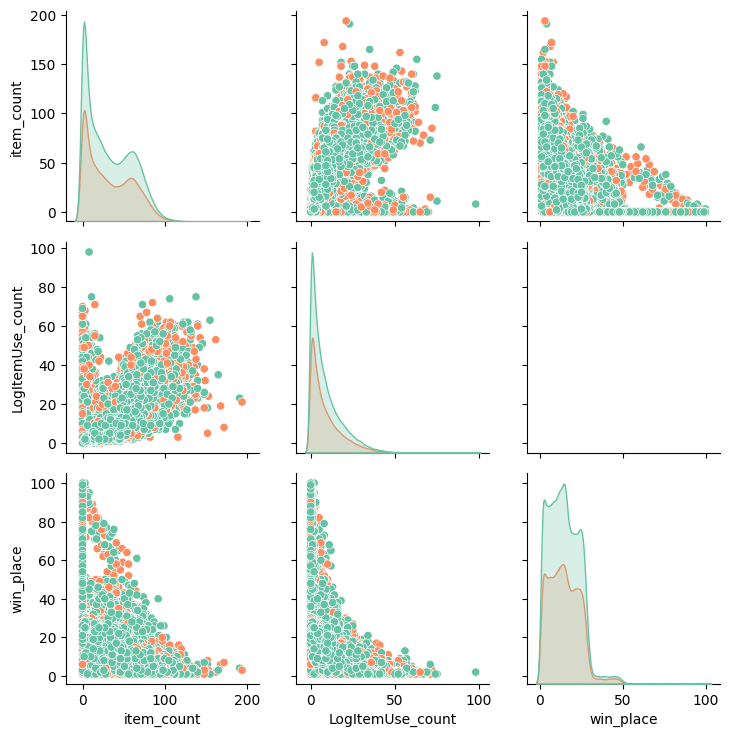

In [76]:
# 순위 추가하여서 시각화 진행
sns.pairplot(
    filtered_data,
    vars=['item_count', 'LogItemUse_count', 'win_place'],
    hue='cluster',
    palette="Set2",
    diag_kind='kde',
    height=2.5
)
plt.show()

# 같은 순위에서 x 값이 순위일 때 y 값이 더 높은 애들이 클러스터1(수집가형)에 속할 것이라는 예상
# 맞음

In [ ]:
# 수집형 애들 시각화
# rank 잘 보정되어보임 -> 순위가 높은 애들이 수집가형인 경우가 많음

# item_count 히스토그램
plt.subplot(1, 3, 1)
plt.hist(both_above['item_count'], bins=20, edgecolor='k', alpha=0.7)
plt.title('item_count')
plt.xlabel('item_count')
plt.ylabel('Frequency')

# LogItemUse_count 히스토그램
plt.subplot(1, 3, 2)
plt.hist(both_above['LogItemUse_count'], bins=20, edgecolor='k', alpha=0.7, color='orange')
plt.title('LogItemUse_count')
plt.xlabel('LogItemUse_count')
plt.ylabel('Frequency')

# win_place 히스토그램
plt.subplot(1, 3, 3)
plt.hist(both_above['win_place'], bins=20, edgecolor='k', alpha=0.7, color='green')
plt.title('win_place')
plt.xlabel('win_place')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# 미니멀리스트 애들 시각화

# item_count 히스토그램
plt.subplot(1, 3, 1)
plt.hist(both_below['item_count'], bins=20, edgecolor='k', alpha=0.7)
plt.title('item_count')
plt.xlabel('item_count')
plt.ylabel('Frequency')

# LogItemUse_count 히스토그램
plt.subplot(1, 3, 2)
plt.hist(both_below['LogItemUse_count'], bins=20, edgecolor='k', alpha=0.7, color='orange')
plt.title('LogItemUse_count')
plt.xlabel('LogItemUse_count')
plt.ylabel('Frequency')

# win_place 히스토그램
plt.subplot(1, 3, 3)
plt.hist(both_below['win_place'], bins=20, edgecolor='k', alpha=0.7, color='green')
plt.title('win_place')
plt.xlabel('win_place')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# 기존 데이터의 모든 열과 클러스터를 합치기 위해 기존 데이터와 결합
data['cluster'] = None  # cluster 열 초기화

# both_above와 both_below의 클러스터 값을 data3에 추가
data.loc[both_above.index, 'cluster'] = 1
data.loc[both_below.index, 'cluster'] = 0

# clustered_data로 클러스터가 지정된 데이터만 필터링
clustered_data = data[data['cluster'].notnull()]
clustered_data

# 마지막에 열에 클러스터 명시되어있음!!